In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Literal


# 1. Define State

In [2]:
class QuadraticState(TypedDict):
    a: int
    b: int
    c: int
    
    equation: str
    discriminant: int
    result: str

# 2. Define Nodes

In [3]:
def show_equation(state: QuadraticState):
    equation = f"{state['a']}x**2 +  {state['b']}x + {state['c']}"
    return {"equation": equation}

In [4]:
def find_discriminant(state: QuadraticState):
    discriminant = state['b']**2 - (4*state['a']*state['c'])
    return {"discriminant": discriminant}

In [10]:
def result_routing(state: QuadraticState) -> Literal['real_roots_determine','repeated_roots_determine','imaginary_roots_determine']:
    if state['discriminant'] == 0:
        return 'repeated_roots_determine'
    elif state['discriminant'] > 0:
        return 'real_roots_determine'
    else :
        return 'imaginary_roots_determine'

In [11]:
def real_roots_determine(state: QuadraticState):
    root1 = (-state['b'] + state['discriminant']**0.5) / 2*state['a']
    root2 = (-state['b'] - state['discriminant']**0.5) / 2*state['a']
    result = f"The roots are {root1} and {root2}"
    return {"result": result}

In [12]:
def repeated_roots_determine(state: QuadraticState):
    root = (-state['b']) / 2*state['a']
    result = f"The repeated roots are {root}"
    return {"result": result}

In [13]:
def imaginary_roots_determine(state: QuadraticState):
    result = "The repeated roots are imaginary"
    return {"result": result}

# 3. Graph 

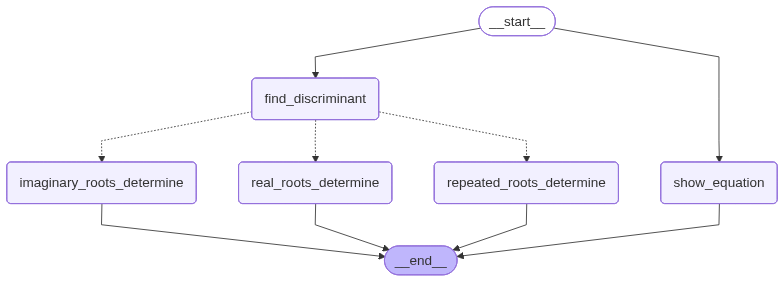

In [15]:
graph = StateGraph(QuadraticState)

graph.add_node('show_equation',show_equation)
graph.add_node('find_discriminant',find_discriminant)
graph.add_node('real_roots_determine',real_roots_determine)
graph.add_node('repeated_roots_determine',repeated_roots_determine)
graph.add_node('imaginary_roots_determine',imaginary_roots_determine)

graph.add_edge(START, 'show_equation')
graph.add_edge(START, 'find_discriminant')

graph.add_conditional_edges('find_discriminant', result_routing)

graph.add_edge('real_roots_determine', END)
graph.add_edge('repeated_roots_determine', END)
graph.add_edge('imaginary_roots_determine', END)
graph.add_edge('show_equation', END)


workflow = graph.compile()
workflow

In [16]:
initial_state = {
    'a':4,
    'b':-5,
    'c':-4,
}
final_state = workflow.invoke(initial_state)
print(final_state)

{'a': 4, 'b': -5, 'c': -4, 'equation': '4x**2 +  -5x + -4', 'discriminant': 89, 'result': 'The roots are 28.867962264113206 and -8.867962264113206'}
